In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
color = sns.color_palette('Set3')

In [2]:
rev = pd.read_csv('rev30_weekly.csv')

In [7]:
rev.head(10)

,pcode,Week,new_qty_pc,new_style_pc,prod_br,prod_dp,sval_pc,sval_pvw_pc,prod_br_pc,unit_dp_pc,clicks,impressions,avg_pos,transactions,CTR,econv_rate
0,ACAC,201423,0.280079,0.105263,70.571429,1300.142857,0.778750,0.838993,0.249546,1.030857,978,10170,1.3,1,0.096165,0.001022
1,ACAC,201424,0.066161,0.021912,71.714286,1187.571429,0.750463,0.751063,0.269781,0.855018,1209,13994,1.8,9,0.086394,0.007444
2,ACAC,201425,0.000000,0.000000,70.285714,1119.285714,0.775713,0.800136,0.244487,0.748354,1315,15764,1.7,8,0.083418,0.006084
3,ACAC,201426,0.328882,0.197487,79.571429,1572.428571,0.791148,0.805672,0.408901,1.456175,1394,14967,1.7,14,0.093138,0.010043
4,ACAC,201427,0.413114,0.273292,80.500000,1736.000000,0.785493,0.854480,0.425342,1.711678,1127,12539,1.7,10,0.089880,0.008873
5,ACAC,201428,0.264932,0.176157,80.285714,1581.000000,0.798959,0.826425,0.421548,1.469564,1223,13952,1.9,18,0.087658,0.014718
6,ACAC,201429,0.008270,0.003745,76.285714,1451.000000,0.795342,0.810289,0.350723,1.266500,1286,14021,1.5,19,0.091720,0.014774
7,ACAC,201430,0.000000,0.000000,76.000000,1380.000000,0.778984,0.784710,0.345664,1.155596,1300,12960,1.4,19,0.100309,0.014615
8,ACAC,201431,0.000000,0.000000,75.428571,1246.000000,0.750883,0.754587,0.335547,0.946285,1205,12950,1.5,13,0.093050,0.010788
9,ACAC,201432,0.000000,0.000000,75.714286,1149.857143,0.739573,0.753855,0.340606,0.796107,1207,14641,1.9,6,0.082440,0.004971


In [5]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pcode         3809 non-null   object 
 1   Week          3809 non-null   int64  
 2   new_qty_pc    3809 non-null   float64
 3   new_style_pc  3809 non-null   float64
 4   prod_br       3809 non-null   float64
 5   prod_dp       3809 non-null   float64
 6   sval_pc       3779 non-null   float64
 7   sval_pvw_pc   3779 non-null   float64
 8   prod_br_pc    3809 non-null   float64
 9   unit_dp_pc    3809 non-null   float64
 10  clicks        3809 non-null   int64  
 11  impressions   3809 non-null   int64  
 12  avg_pos       3809 non-null   float64
 13  transactions  3809 non-null   int64  
 14  CTR           3809 non-null   float64
 15  econv_rate    3809 non-null   float64
dtypes: float64(11), int64(4), object(1)
memory usage: 476.2+ KB


In [8]:
rev.describe()

,Week,new_qty_pc,new_style_pc,prod_br,prod_dp,sval_pc,sval_pvw_pc,prod_br_pc,unit_dp_pc,clicks,impressions,avg_pos,transactions,CTR,econv_rate
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3779.000000,3779.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,201439.431872,0.220464,0.108628,138.220358,1808.573091,0.658636,0.717520,0.017484,0.018319,323.221318,9444.318456,2.427671,7.309005,0.040292,0.026398
std,76.906368,0.163950,0.091194,81.693589,2673.559011,0.093184,0.102575,0.266468,0.492868,331.597011,8821.096582,1.024867,6.911606,0.019158,0.024341
min,201312.000000,0.000000,0.000000,6.000000,48.142857,0.415938,0.373610,-0.880872,-0.907844,2.000000,49.000000,0.000000,0.000000,0.003929,0.000000
25%,201352.000000,0.093302,0.046563,72.000000,584.200000,0.604397,0.652667,-0.137016,-0.295768,143.000000,3568.000000,1.700000,3.000000,0.023849,0.013761
50%,201434.000000,0.193906,0.091304,123.571429,1192.428571,0.654878,0.717194,0.008612,-0.043640,239.000000,6875.000000,2.200000,6.000000,0.038929,0.022727
75%,201517.000000,0.319259,0.147249,188.285714,2233.285714,0.703782,0.774477,0.167289,0.233345,402.000000,11762.000000,3.100000,10.000000,0.053359,0.033981
max,201548.000000,1.000000,1.000000,662.285714,45054.142860,1.503480,1.662516,1.577683,3.313707,3329.000000,64501.000000,7.000000,73.000000,0.112637,0.692308


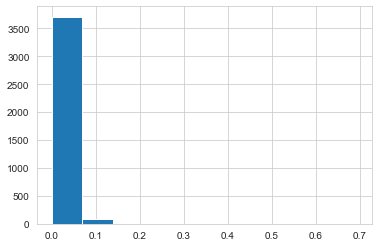

In [9]:
rev['econv_rate'].hist()
plt.show()

In [10]:
rev['econv_rate'].describe()

count    3809.000000
mean        0.026398
std         0.024341
min         0.000000
25%         0.013761
50%         0.022727
75%         0.033981
max         0.692308
Name: econv_rate, dtype: float64

In [11]:
type(rev['econv_rate'])

pandas.core.series.Series

In [12]:
def conversion_rate(x):
    if x > 0.033:
        return 'high'
    elif x < 0.02:
        return 'low'
    else:
        return 'normal'

In [13]:
rev['cr'] = rev['econv_rate'].apply(lambda x:conversion_rate(x))

In [15]:
rev['cr'].value_counts(normalize = True)

low       0.422158
normal    0.311630
high      0.266212
Name: cr, dtype: float64

**1. Impressions vs. CTR vs. Level of conversion rate**

<Figure size 720x576 with 0 Axes>

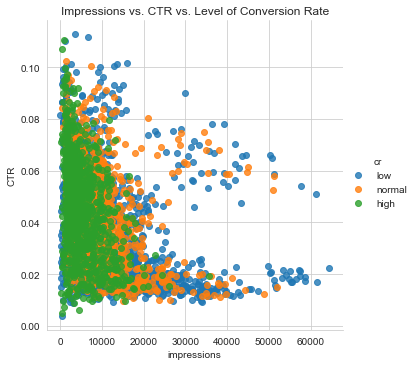

In [17]:
plt.figure(figsize = (10,8))
sns.lmplot(data=rev, x = 'impressions', y='CTR', hue='cr', fit_reg=False)
plt.title('Impressions vs. CTR vs. Level of Conversion Rate')
plt.show()


* No positive linear relationship with impressions and CTR.
- High impression won't result in high CTR
* Most of high conversion rate points appear between 0 to 20000 impressions range.


**2. Conversion rate vs. Impressions**

In [19]:
mean_impression = rev.groupby('cr').agg({'impressions':'mean'}).reset_index()

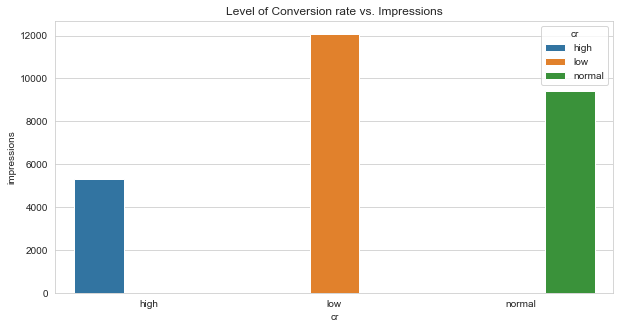

In [20]:
plt.figure(figsize = (10,5))
sns.barplot(data=mean_impression, x = 'cr', y='impressions', hue='cr')
plt.title('Level of Conversion rate vs. Impressions')
plt.show()


* high immpression wont' resuilt in high conversion rate
- low converation rate level has the highest average impressions


**3. Conversion rate vs. rank position**


In [21]:
mean_pos = rev.groupby('cr').agg({'avg_pos':'mean'}).reset_index()

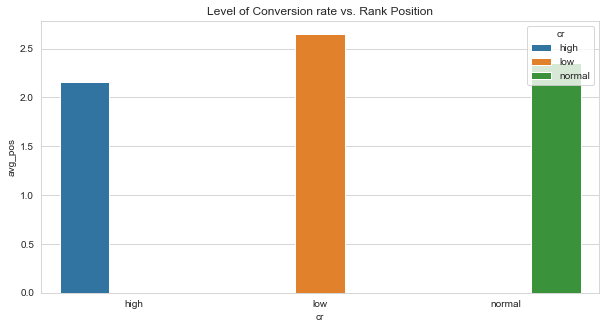

In [22]:
plt.figure(figsize = (10,5))
sns.barplot(data=mean_pos, x = 'cr', y='avg_pos', hue='cr')
plt.title('Level of Conversion rate vs. Rank Position')
plt.show()

* low converation rate level has the highest average rank position


**4. Conversion rate vs. unit_dp_pc**

In [23]:
mean_unit_dp_pc = rev.groupby('cr').agg({'unit_dp_pc':'mean'}).reset_index()

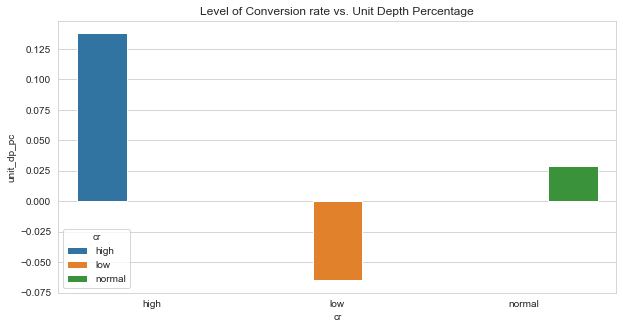

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(data=mean_unit_dp_pc, x = 'cr', y='unit_dp_pc', hue='cr')
plt.title('Level of Conversion rate vs. Unit Depth Percentage')
plt.show()


* Low converation rate has negative average unit depth
- High converation rate has highest average unit depth %
* Unit depth% will affect our converation rate

**5. Conversion rate vs. Year**


In [25]:
rev['year'] = rev['Week'].apply(lambda x: str(x)[:4])

In [26]:
rev['year'].value_counts()

2015    1438
2014    1398
2013     973
Name: year, dtype: int64

In [27]:
mean_year = rev.groupby('year').agg({'econv_rate':'mean'}).reset_index()


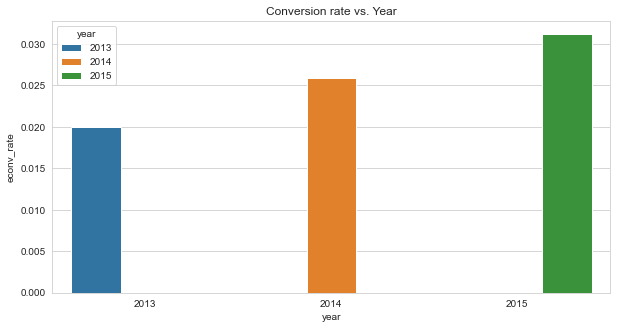

In [28]:
plt.figure(figsize = (10,5))
sns.barplot(data=mean_year, x = 'year', y='econv_rate', hue='year')
plt.title('Conversion rate vs. Year')
plt.show()

* Conversion rate increased over years


**6. Conversion rate vs. prod_br**


In [29]:
mean_prod_br = rev.groupby('cr').agg({'prod_br':'mean'}).reset_index()

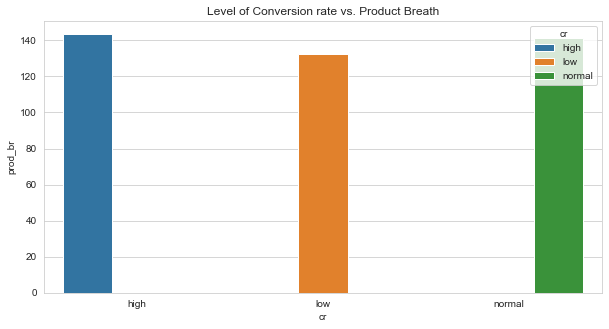

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(data=mean_prod_br, x = 'cr', y='prod_br', hue='cr')
plt.title('Level of Conversion rate vs. Product Breath')
plt.show()

* Product breadth will affect our converstion rate


**Correlation**

In [32]:
 rev.head()


,pcode,Week,new_qty_pc,new_style_pc,prod_br,prod_dp,sval_pc,sval_pvw_pc,prod_br_pc,unit_dp_pc,clicks,impressions,avg_pos,transactions,CTR,econv_rate,cr,year
0,ACAC,201423,0.280079,0.105263,70.571429,1300.142857,0.778750,0.838993,0.249546,1.030857,978,10170,1.3,1,0.096165,0.001022,low,2014
1,ACAC,201424,0.066161,0.021912,71.714286,1187.571429,0.750463,0.751063,0.269781,0.855018,1209,13994,1.8,9,0.086394,0.007444,low,2014
2,ACAC,201425,0.000000,0.000000,70.285714,1119.285714,0.775713,0.800136,0.244487,0.748354,1315,15764,1.7,8,0.083418,0.006084,low,2014
3,ACAC,201426,0.328882,0.197487,79.571429,1572.428571,0.791148,0.805672,0.408901,1.456175,1394,14967,1.7,14,0.093138,0.010043,low,2014
4,ACAC,201427,0.413114,0.273292,80.500000,1736.000000,0.785493,0.854480,0.425342,1.711678,1127,12539,1.7,10,0.089880,0.008873,low,2014


In [33]:
 col = ['pcode', 'cr']


In [34]:
 rev1 = rev.drop(col,axis=1)


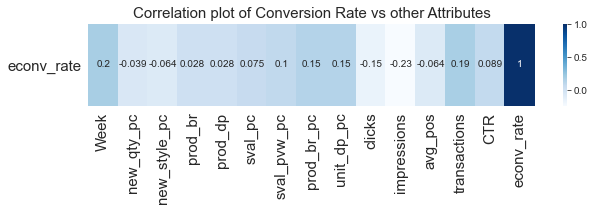

In [35]:
fig, ax = plt.subplots(figsize=(10, 1.5))
corr_plot = sns.heatmap(rev1.corr()[-1:],cmap='Blues',annot=True)
ax.tick_params(axis="x", labelsize=15, rotation=90)
ax.tick_params(axis="y", labelsize=15, rotation=0)
plt.title("Correlation plot of Conversion Rate vs other Attributes", fontsize=
15, y=1.08)
plt.show()


In [36]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pcode         3809 non-null   object 
 1   Week          3809 non-null   int64  
 2   new_qty_pc    3809 non-null   float64
 3   new_style_pc  3809 non-null   float64
 4   prod_br       3809 non-null   float64
 5   prod_dp       3809 non-null   float64
 6   sval_pc       3779 non-null   float64
 7   sval_pvw_pc   3779 non-null   float64
 8   prod_br_pc    3809 non-null   float64
 9   unit_dp_pc    3809 non-null   float64
 10  clicks        3809 non-null   int64  
 11  impressions   3809 non-null   int64  
 12  avg_pos       3809 non-null   float64
 13  transactions  3809 non-null   int64  
 14  CTR           3809 non-null   float64
 15  econv_rate    3809 non-null   float64
 16  cr            3809 non-null   object 
 17  year          3809 non-null   object 
dtypes: float64(11), int64(4), ob

In [37]:
rev.isnull().sum()

pcode            0
Week             0
new_qty_pc       0
new_style_pc     0
prod_br          0
prod_dp          0
sval_pc         30
sval_pvw_pc     30
prod_br_pc       0
unit_dp_pc       0
clicks           0
impressions      0
avg_pos          0
transactions     0
CTR              0
econv_rate       0
cr               0
year             0
dtype: int64

In [38]:
rev = rev.dropna()

**Linear Regression**

In [39]:
col1 = ['pcode', 'cr','Week']

In [40]:
rev2 = rev.drop(col,axis=1)

In [47]:
target = rev2['econv_rate']
predictors = rev2.drop('econv_rate', axis=1)

In [48]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

**Conclusion:**

How to improve conversion rate:
  * increase product breath  
  - increase unit depth